# 2.28 Python NumPy Часть 1

In [1]:
# организация программной среды
# загрузка модулей и пользовательские установки
import numpy as np,sympy as sp,pandas as pd,pylab as pl
import random,torch,functools,itertools,requests
from io import StringIO
from sympy import init_printing; init_printing(unicode=True) 
from IPython.display import display,HTML,Latex

In [2]:
def coloring(f):
    @functools.wraps(f)
    def wrapped(*args, **kwargs):
        link = f"""<style>
        @import 'https://fonts.googleapis.com/css?family=Roboto';
        </style>"""
        # случайный оттенок цвета темнее всего спектра
        # 0xFFFFFF - любой случайный оттенок
        col=(f"color:#{random.randint(0,0x3333FF):06x};" 
             for i in range(len(args)))
        font='font-size:16px; font-family:Roboto;'
        return f(*(HTML(link+f"<p style='{next(col)} {font}'>{a}</p>")
                   for i,a in enumerate(args)), **kwargs)
    return wrapped
# определение функций для строк и массивов
@coloring
def sdisplay(*args, **kwargs):
    return display(*args, **kwargs)
def mdisplay(*arrs):
    for arr in arrs:
        col="\color {#"+f"{random.randint(0,0x3333FF):06x}"+"} "
        if len(arr.shape)==1: arr=[arr]
        display(Latex(col+"{"+sp.latex(sp.Matrix(arr))+"}"))

In [3]:
# генерация строк для случайного цвета 
[f"#{random.randint(0,0xAAAAFF):06x}" for i in range(5)]

['#33d7e5', '#278c9a', '#14268f', '#9391e2', '#2ae204']

## Создание массивов
- из последовательных типов Python
- используя функции, определенные в модуле
- модифицируя существующие
- загружая информацию из внешних источников
- из объектов других модулей
- ...

In [4]:
# свойства объекта
x = np.array([1,2,5.,8])
display(*x.__array_interface__.items())

('data', (134473936, False))

('strides', None)

('descr', [('', '<f8')])

('typestr', '<f8')

('shape', (4,))

('version', 3)

In [5]:
# из последовательных типов Python
# 8-bit signed integer => [-2**7; 2**7-1]
lst1 = [2**7+i-1 for i in range(5)]
arr1 = np.array(lst1, dtype=np.int8)
lst2 = [2**31+i-1 for i in range(5)]
arr2 = np.array(lst2, dtype=np.int32)
sdisplay(arr1, arr2)

In [6]:
# 16-bit unsigned integer => [0; 2**16-1]
arr1 = np.array([2, 3, 4], dtype=np.uint16)
arr2 = np.array([4, 4, 4], dtype=np.uint16)
# одинаковый тип данных
arr3 = arr1 - arr2
# разные типы данных массивов =>
# тип данных, включающий все элементы вычислений
arr4 = arr1 - arr2.astype(np.int16)
sdisplay(arr3, arr3.dtype, arr4, arr4.dtype)

In [7]:
# встроенные функции numpy
arr1D_1 = np.arange(2,20,2,dtype=float)
# 10 равных промежутков на отрезке [0; 1] - 11 точек
arr1D_2 = np.linspace(1,3,11)
mdisplay(arr1D_1,arr1D_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
# диагональные матрицы, по умолчанию - квадратные
arr2D_1 = np.eye(3,6)
arr2D_2 = np.diag([1,2,3],2)
# числа в последовательности в степени до 0,1,2,3 (до 4-1)
arr2D_3 = np.vander((1,3,5),4)
mdisplay(arr2D_1,arr2D_2,arr2D_3)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
# нули и единицы
mdisplay(np.zeros((2,3)),np.ones((3,2)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [10]:
# массивы случайных чисел
# np.random.choice(5,10) <=> np.random.randint(0,5,10)
mdisplay(np.random.choice(5,10,p=[.1,0,.3,.6,0]))

<IPython.core.display.Latex object>

In [11]:
# влияет на оригинальный объект
arr11 = np.array([1,2,3,4,5])
arr21 = arr11[:2]
arr21 += 1
# не влияет на оригинальный объект
arr12 = np.array([1,2,3,4,5])
arr22 = arr12.copy()[:2]
arr22 += 1
sdisplay([arr11,arr21],[arr12,arr22])

In [12]:
# numpy.vstack, numpy.hstack, numpy.block...
arr = np.block([[np.ones((2,2)),np.eye(2,2)],
                [np.zeros((2,2)),np.diag((10,100))]])
mdisplay(arr)

<IPython.core.display.Latex object>

In [13]:
%%writefile example.csv
x, y, z
0, 0, 0
1, 1, 1
2, 4, 8

Writing example.csv


In [14]:
# из внешних источников
arr = np.loadtxt('example.csv',delimiter=',',skiprows=1)
mdisplay(arr)

<IPython.core.display.Latex object>

[Importing data with genfromtxt](https://numpy.org/devdocs/user/basics.io.genfromtxt.html)

In [15]:
# из строковых объектов
data = u"""#
# комментарий
1, 2\n3, 4
5,   6 # добавим лишних пробелов
7, 8\n9, 0
"""
arr = np.genfromtxt(StringIO(data),comments="#",delimiter=",")
sdisplay(arr,arr.dtype)

In [16]:
# из рамок данных pandas
df = pd.DataFrame(
    {"A":[1,2],"B":[3.,4.],
     "D":pd.date_range('2000',periods=2)})
# массив с учетом всех типов данных
sdisplay([df.to_numpy()],[df.__array__()])

In [17]:
# не меняет типа (класса) исходного объекта
s = np.add(pd.Series(range(5)),range(5))
print(type(s))
sdisplay(s)
t = np.sqrt(torch.tensor([[1,2],[3,4]]))
print(type(t))
sdisplay(t)

<class 'pandas.core.series.Series'>


<class 'torch.Tensor'>


In [18]:
# не получится сразу превратить в np.array
# упражнение только при запуске ускорителя
# x_torch = torch.arange(5,device='cuda')
# print(type(x_torch))
# sdisplay(x_torch)
# x = np.exp(x_torch.detach().cpu().numpy())
# print(type(x))
# sdisplay(x)

In [19]:
# из списка, созданного итератором
s = ["🍊","🍋","🍎"]
s = np.array(list(itertools.permutations(s,2)))
s

array([['🍊', '🍋'],
       ['🍊', '🍎'],
       ['🍋', '🍊'],
       ['🍋', '🍎'],
       ['🍎', '🍊'],
       ['🍎', '🍋']], dtype='<U1')

## Обращение к элементам массива

In [20]:
# индексирование двумя способами
x = np.arange(10).reshape(2,5)
sdisplay(x,x[0,2]==x[0][2])

In [21]:
# индексы: срезы, интервалы, списки, кортежи
x = np.arange(16).reshape(4,4)
mdisplay(x)
sdisplay(x[slice(2,3)],x[range(2,3)],x[[2,2]],x[(2,2)])

<IPython.core.display.Latex object>

In [22]:
# задание - определить закономерности отбора объектов
x = np.arange(30).reshape(3,10)
mdisplay(x,x[2:],x[:,::-3])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [23]:
# размерность "сетки" должна совпадать (3x3)
x = np.arange(35).reshape(5,7)
idx1,idx2 = [0,2,4],[1,3,5]
mdisplay(x,x[idx1,idx2])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [24]:
x = np.arange(35).reshape(5,7)
rows1 = np.array([[0,0],[3,3]], dtype=np.intp)
cols1 = np.array([[1,4],[1,4]], dtype=np.intp)
# нет необходимости в повторении 
rows2 = np.array([0,3], dtype=np.intp)
cols2 = np.array([1,4], dtype=np.intp)
mdisplay(x,x[rows1,cols1],
         x[rows2[:,np.newaxis],cols2],
         x[np.ix_(rows2,cols2)])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [25]:
# многомерное индексирование
x = np.arange(24).reshape(2,3,4)
# одинаковый результат отбора
sdisplay(x,x[...,0],x[:,:,0])

In [26]:
# 4-хмерный массив и 2-мерный срез
x = np.array(12*[0,1,2]).reshape(3,2,2,3)
sdisplay(x,x.shape,x[0],x[0,...,2],x[0,...,2].shape)

In [27]:
# увеличение размерности
x = np.arange(12).reshape(2,3,2)
sdisplay(x,x[:,:,:,np.newaxis],x[:,:,:,None])

## Присвоение новых значений

In [28]:
x = np.arange(16).reshape(4*(2,))
sdisplay(x)
sdisplay(x[1,Ellipsis,1])# x[1,Ellipsis,1]==x[1,...,1]
# тип данных один для всего массива
# выполняется, если возможно извлечь значения того же типа
x[1,Ellipsis,1] = 100.2
sdisplay(x)

## Продвинутое  индексирование
- логическое
- именованное
- итерационное
- ...



In [29]:
x = np.array([[1,2],[np.nan,3],[np.nan,np.nan],[4,np.nan]])
print(x.shape)
# 1D отбор существующих значений
sdisplay(x[~np.isnan(x)])

(4, 2)


In [30]:
x = np.arange(15).reshape(5,3)
# матрица, маркирующая выполнение условия
# для каждого элемента
cond = x > 10
sdisplay(cond)
mdisplay(cond[3:,:].astype('int'),x[cond])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
x = np.arange(15).reshape(5,3)
mdisplay(x)
# применение метода .sum() в разных измерениях
sdisplay(x.sum(),x.sum(axis=0),x.sum(axis=1),x.sum(-1))
# выбор строк по сумме элементов в строке 
cond = x.sum(-1) <= 20
mdisplay(x[cond])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [32]:
# возможно сочетание разных типов данных
x = np.ones((1,3),dtype=[('a',np.int32),('b',np.float64,(2,1))])
display(x)
# организация именных полей
sdisplay(x['a'],x['a'].shape,x['b'],x['b'].shape)

array([[(1, [[1.], [1.]]), (1, [[1.], [1.]]), (1, [[1.], [1.]])]],
      dtype=[('a', '<i4'), ('b', '<f8', (2, 1))])

In [33]:
x = np.arange(1,7).reshape(2,3)
sdisplay(x)
# 1D итератор
print(type(x.flat))
x.flat = 0
sdisplay(x)
x.flat[1:4] = 1
sdisplay(x)

<class 'numpy.flatiter'>


## Типы данных

In [34]:
url='https://numpy.org/devdocs/user/basics.types.html'
page = requests.get(url).text
data_types = pd.read_html(page)[0]
props = [('min-height','30px'),('min-wigth','15px'),
         ('text-align','center'),('color','darkblue')]
cells = {'selector':'td','props':props}
data_types.style.set_table_styles([cells])

,Numpy type,C type,Description
0,numpy.bool_,bool,Boolean (True or False) stored as a byte
1,numpy.byte,signed char,Platform-defined
2,numpy.ubyte,unsigned char,Platform-defined
3,numpy.short,short,Platform-defined
4,numpy.ushort,unsigned short,Platform-defined
5,numpy.intc,int,Platform-defined
6,numpy.uintc,unsigned int,Platform-defined
7,numpy.int_,long,Platform-defined
8,numpy.uint,unsigned long,Platform-defined
9,numpy.longlong,long long,Platform-defined


In [35]:
# огромное количество способов управления типами 
x = np.float32(range(5))
y = np.arange(3,dtype=np.uint8)
sdisplay([x],[y],[y.astype(float)],[np.uint8(x)])

In [36]:
# границы значений
sdisplay([np.iinfo(np.int64)])

In [37]:
# np.longdouble - выше точность вычислений, чем python float
sdisplay([np.finfo(np.longdouble)])

In [38]:
# таблица приведения типов данных 
mark = {False:'\033[1;31m -\033[0;0m', 
        True:'\033[1;34m +\033[0;0m'}
nptypes = np.typecodes['All']
print('* ' + ' '.join(nptypes))
for row in nptypes:
    print(row,end='')
    for col in nptypes:
        print(mark[np.can_cast(row,col)],end='')
    print()

* ? b h i l q p B H I L Q P e f d g F D G S U V O M m
? + + + + + + + + + + + + + + + + + + + + + + + + - +
b - + + + + + + - - - - - - + + + + + + + + + + + - +
h - - + + + + + - - - - - - - + + + + + + + + + + - +
i - - - + + + + - - - - - - - - + + - + + + + + + - +
l - - - - + + + - - - - - - - - + + - + + + + + + - +
q - - - - + + + - - - - - - - - + + - + + + + + + - +
p - - - - + + + - - - - - - - - + + - + + + + + + - +
B - - + + + + + + + + + + + + + + + + + + + + + + - +
H - - - + + + + - + + + + + - + + + + + + + + + + - +
I - - - - + + + - - + + + + - - + + - + + + + + + - +
L - - - - - - - - - - + + + - - + + - + + + + + + - -
Q - - - - - - - - - - + + + - - + + - + + + + + + - -
P - - - - - - - - - - + + + - - + + - + + + + + + - -
e - - - - - - - - - - - - - + + + + + + + + + + + - -
f - - - - - - - - - - - - - - + + + + + + + + + + - -
d - - - - - - - - - - - - - - - + + - + + + + + + - -
g - - - - - - - - - - - - - - - - + - - + + + + + - -
F - - - - - - - - - - - - - 

## Передаваемые (`broadcastable`) массивы
- типы данных
- размерность
- правила математических операций
- ...

In [39]:
# умножение выполнится со списком. но не с массивом
# несовместимо с типом данных
np.array(3*['a','b'])

array(['a', 'b', 'a', 'b', 'a', 'b'], dtype='<U1')

In [40]:
# совместимость размерности массивов
# в соответствии с правилами умножения
from numpy.linalg import multi_dot
A = np.random.random((10,100))
B = np.random.randint(1,100,(100,1000))
C = np.random.random((1000,5))
D = np.random.random((5,3))
# умножение матриц с одинаковым результатом
# np.dot(np.dot(np.dot(A, B), C), D)
# A.dot(B).dot(C).dot(D)
M = multi_dot([A, B, C, D])
mdisplay(M)

<IPython.core.display.Latex object>

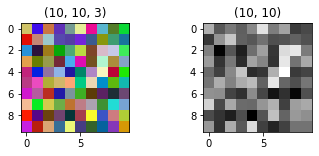

In [41]:
# пример совместимости размерности #1
# изображение                             (3d): 256 x 256 x 3
# черно-белое масштабирование             (1d):             3
# результат                               (3d): 256 x 256
img = np.random.random((10,10,3))
# каждый пиксель - скалярное произведение
# вектора цвета [r,g,b] на вектор [.33,.33,.33]
gray_img = np.dot(img,3*[.33])
f, (ax1,ax2) = pl.subplots(1,2,figsize=(6,2))
ax1.imshow(img)
ax1.set_title(f'{img.shape}')
ax2.imshow(gray_img,cmap='gray')
ax2.set_title(f'{gray_img.shape}');

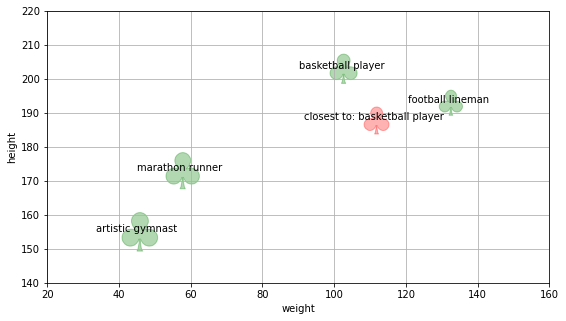

In [42]:
# пример совместимости размерности #2
# к какому из 4 атлетов точка sample ближе всего по показателям
values = np.array(
    [[102.,203.],[132.,193.],[45.,155.],[57.,173.]])
sample = np.array([111., 188.])
labels =['basketball player','football lineman',
         'artistic gymnast','marathon runner']
fig,ax = pl.subplots(figsize=(9,5))
ax.scatter(values[:,0],values[:,1],500*values[:,1]/values[:,0],
           c="green",alpha=.3,marker=r'$\clubsuit$')
[ax.annotate(labels[i],values[i],ha='center') for i in range(4)]
# сравнение 2 тех же самых характеристик (рост и вес)
diff = values - sample # broadcastable !!!
dist = np.sqrt(np.sum(diff**2,axis=-1))
ax.scatter(sample[0],sample[1],500*sample[1]/sample[0],
           c="red",alpha=.3,marker=r'$\clubsuit$')
ax.annotate('closest to: '+labels[np.argmin(dist)],
            sample,ha='center')
ax.set_xlabel("weight"); ax.set_ylabel("height")
ax.set_xlim(20,160); ax.set_ylim(140,220); ax.grid();

## Копии и представления массивов
- изменения в представлении отражаются в исходных данных
- изменения в копии не влияют на оригинал

In [43]:
# базовое индексирование => представление 
x = np.arange(10)
y = x[1:3]
sdisplay(y,x,y.base)
x[1:3] = [100,101]
sdisplay(y,x,y.base)

In [44]:
# продвинутое индексирование => копия 
x = np.arange(10)
y = x[[1,2]]
sdisplay(y,x,y.base)
x[1:3] = [100,101]
sdisplay(y,x,y.base)

In [45]:
x = np.random.random((2,3))
y = x.T
sdisplay(y.base,y)
# несовместимы форма представления и модификация
# y.shape = 6 - ошибка
# reshape создает или представления, или копии
z = y.reshape(6)
x[0,:] = [0,0,0]
sdisplay(y,z.base,z)

## Структурированные массивы

In [46]:
# значения полей
lst = [('Liza',4.5,23),('Tom',4.2,27),('Dan',4.9,25)]
# описание полей
d = {'name':('U10',0),'grade':('float',1),'age':('i4',2)}
x = np.array(lst,dtype=d)
x[0] = ('Mary',4.7,26)
x = np.append(x,np.array([('Liza',4.5,23)],dtype=x.dtype))
display(x)
sdisplay(x[:2],x[['name','age']])

array([('\U001acd4d\U12cc0000@y', 4.69921875, 26),
       ('\U001bcd54\U10cc0000@', 4.19921875, 27),
       ('\U00199a44\U13990000@', 4.89941406, 25),
       ('\U0017004c\U12000000@a', 4.5       , 23)],
      dtype={'names': ['name', 'grade', 'age'], 'formats': ['<U10', '<f8', '<i4'], 'offsets': [0, 1, 2], 'itemsize': 40})

In [47]:
# заполнение полей структурированного массива
x = np.zeros(1)
display(x)
x = np.zeros(1, dtype='i8, f4, ?, S1')
display(x)
x[:] = -1
display(x)
x[:] = 3
display(x)

array([0.])

array([(0, 0., False, b'')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

array([(-1, -1.,  True, b'-')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

array([(3, 3.,  True, b'3')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])